In [93]:
import numpy as np
from scipy.interpolate import CubicSpline

from scipy.sparse import coo_matrix

import matplotlib.pyplot as plt
from numpy import cos, sin, log, tan
from math import pi, exp

import time

import random

In [94]:
def f_i(o, n, d, b):
    #print(o, n, d, b)
    lamb=650*10**-9
    k=2*pi/lamb
    e=k*b*sin(o)/2
    nu=k*d*sin(o)/2
    #print(e, nu)
    ans=((sin(e)/e)*(sin(n*nu)/sin(nu)))**2
    return ans


# При n=1

In [95]:
b=0.52*10**-3
d=1*10**-3
n=1
step=1/3600*pi/180
o=np.arange(-pi/180/1.5+step, pi/180/1.5+step, 1/3600*pi/180)
io=[f_i(el, n, d, b) for el in o]
print(len(io))


4800


In [96]:
k=-9
minimums=[]
for j in range(len(io)):
    if io[j-1]>io[j]<io[j+1]:
        #print(k, o[j]*20*180)
        minimums+=[o[j]*20*180]
print()
for i in range(1, len(minimums)):
    k+=1
    if k==0: k+=1
    min=minimums[i]-minimums[i-1]
    print(k, int(min), int(min*60-int(min)*60))


-8 4 30
-7 4 30
-6 4 30
-5 4 30
-4 4 30
-3 4 30
-2 4 29
-1 4 30
1 9 0
2 4 30
3 4 29
4 4 30
5 4 30
6 4 30
7 4 30
8 4 30
9 4 30


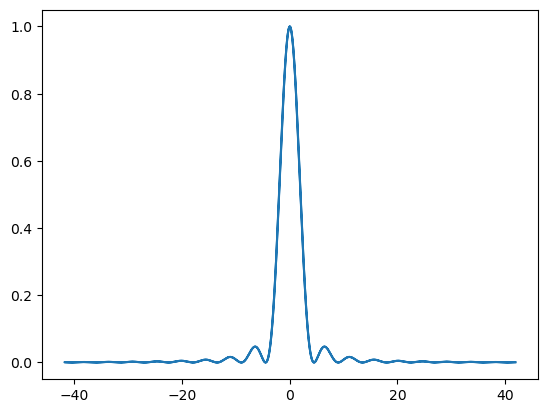

In [97]:
o=o*20*180
o=np.concatenate([o[::-1], o])
io=np.concatenate([io[::-1], io])
plt.plot(o, io)

# При n=2

In [98]:
b=0.52*10**-3
d=1.5*10**-3
n=2
step=1/3600*pi/180
o=np.arange(-pi/180/3, pi/180/3+step, 1/3600*pi/180)
print(n, d, b)
io=[f_i(el, n, d, b) for el in o]
io3=[f_i(el, n, d/2, b) for el in o]
io2=[f_i(el, n, d/1.5, b) for el in o]
print(len(io))

2 0.0015 0.0005200000000000001
2401


In [99]:
k=-17
minimums=[]
for j in range(1,len(io)-1):
    if io[j-1]>io[j]<io[j+1]:
        #print(j, o[j]*20*180)
        minimums+=[o[j]*20*180]
print(len(minimums))
for i in range(1, len(minimums)):
    k+=1
    if k==0:
        k+=1
        print()
    min=minimums[i]-minimums[i-1]
    print(k, int(min), int(min*60-int(min)*60))

34
-16 1 30
-15 0 3
-14 1 33
-13 1 34
-12 1 19
-11 0 13
-10 1 34
-9 1 33
-8 1 8
-7 0 25
-6 1 34
-5 1 33
-4 0 57
-3 0 36
-2 1 33
-1 1 33

1 1 34
2 1 33
3 1 33
4 0 36
5 0 57
6 1 33
7 1 34
8 0 25
9 1 8
10 1 33
11 1 34
12 0 13
13 1 19
14 1 34
15 1 33
16 0 3
17 1 30


In [100]:
minets=[]
io_maxes=[]
for j in range(len(io)-10):
    if io[j-1]>io[j]<io[j+1]:
        minets+=[o[j]*20*180]
        io_maxes+=[io[j]]
        print(j, o[j]*20*180, io[j])

83 -19.495327744776635 1.4871011470887887e-06
169 -17.994344588061487 4.825975325715212e-09
172 -17.941984710501657 6.202874987836813e-10
261 -16.388641676226676 7.4346334318446365e-06
351 -14.817845349431751 4.629305686529119e-07
427 -13.491395117916039 3.308244013023292e-07
440 -13.264502315156772 1.013788730027065e-07
530 -11.693705988361849 8.803297228864319e-06
619 -10.140362954086868 2.0198284417927252e-08
684 -9.005898940290534 9.785491401086775e-07
708 -8.587019919811887 1.7941612893491493e-06
798 -7.016223593016964 9.334927973845638e-06
887 -5.4628805587419835 3.5834100366774225e-06
942 -4.502949470145086 1.5058589380326146e-06
977 -3.89208423194706 2.3347114615058023e-05
1066 -2.3387411976720798 9.607961189520095e-06
1155 -0.7853981633970997 0.0004271859179331286
1245 0.7853981633978241 0.0004271859180476955
1334 2.338741197672804 9.607961178460183e-06
1423 3.892084231947784 2.3347114610726005e-05
1458 4.50294947014581 1.5058589387738808e-06
1513 5.462880558742708 3.583410038

In [101]:
#[print(minets[i]-minets[i-1]) for i in range(1, len(minets))]

In [102]:
def resh(o, n, d, b):
    #print(o, n, d, b)
    lamb=650*10**-9
    k=2*pi/lamb
    e=k*b*sin(o)/2
    nu=k*d*sin(o)/2
    #print(e, nu)
    ans=((sin(e)/e))**2
    return ans
    

resh_mass=[resh(el, n, d, b) for el in o]

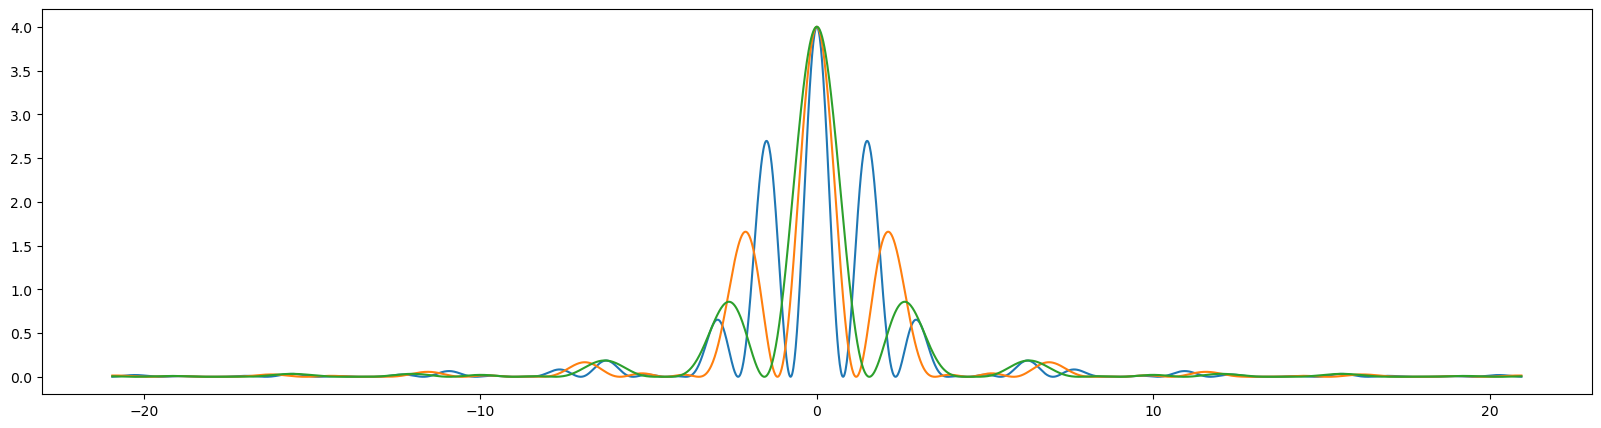

In [103]:
plt.figure(figsize = (20, 5))
plt.plot(o*20*180, io)
plt.plot(o*20*180, io2)
plt.plot(o*20*180, io3)

#plt.plot(o*20*180, resh_mass)
#plt.plot(minimums, [0]*len(minimums), 'o')
#plt.plot(minets, io_maxes, 'o')

# При n=15

In [104]:
b=0.52*10**-3
d=2*10**-3
n=15
step=1/3600*pi/180
o=np.arange(-pi/180/40, pi/180/40+step, 1/3600*pi/180)
io=[f_i(el, n, d, b) for el in o]
print(len(io))

181


In [105]:
for j in range(1, len(io)-1):
    if io[j-1]<io[j]>io[j+1]:
        min=o[j]*20*180
        print(j, int(min), int(min*60-int(min)*60), io[j])


3 -1 -31 1.0341280074735542
7 -1 -26 1.4410988607532884
12 -1 -21 2.9690597067091278
17 -1 -16 7.546587276422406
23 -1 -10 179.21318198772966
29 -1 -3 8.463685796591138
34 0 -58 3.461566394433716
39 0 -53 1.7419414180198656
43 0 -49 1.3711854431277453
48 0 -43 0.9700916777353092
52 0 -39 0.9727625652976106
56 0 -35 0.8402251021022903
61 0 -30 1.0021931232424872
65 0 -26 1.0452274407167976
70 0 -20 1.5001255787791385
74 0 -16 1.9938982137299668
79 0 -11 4.030252561310121
84 0 -6 10.042332515520833
90 0 0 225.0
96 0 6 10.042332515516854
101 0 11 4.0302525613101
106 0 16 1.9938982137308132
110 0 20 1.5001255787790853
115 0 26 1.0452274407172462
119 0 30 1.0021931232424637
124 0 35 0.8402251021026721
128 0 39 0.9727625652976075
132 0 43 0.9700916777348659
137 0 49 1.3711854431277577
141 0 53 1.7419414180190809
146 0 58 3.461566394433639
151 1 3 8.463685796594232
157 1 10 179.21318198773514
163 1 16 7.546587276419135
168 1 21 2.9690597067090376
173 1 26 1.4410988607538633
177 1 31 1.0341280

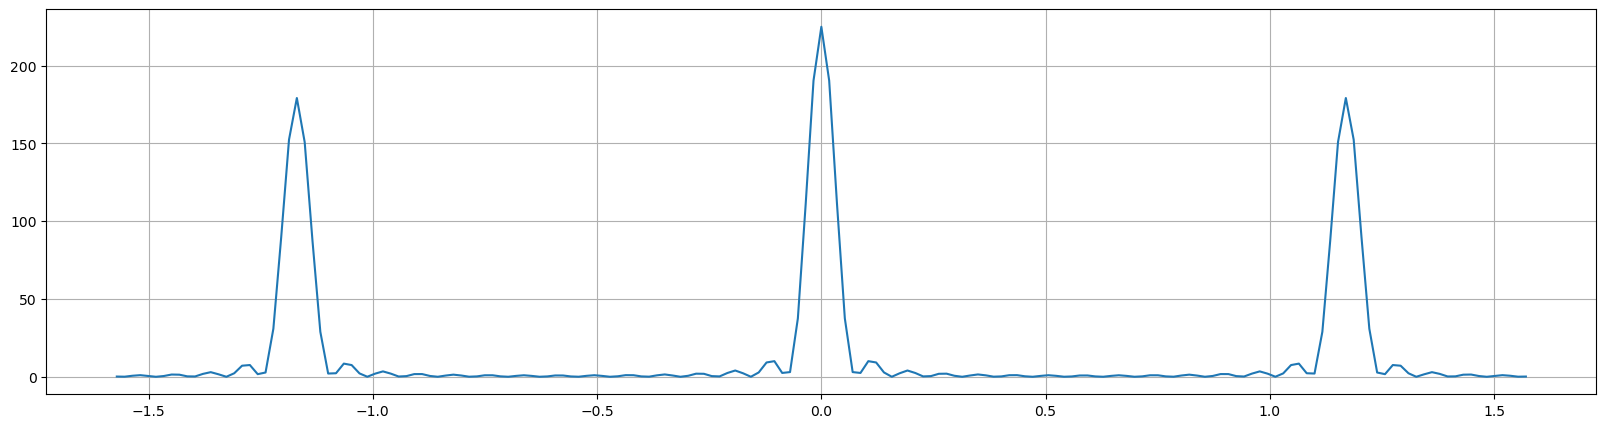

In [106]:
plt.figure(figsize = (20, 5))
plt.grid()
plt.plot(o*20*180, io)

In [107]:
b=0.52*10**-3
d=2*10**-3
n=6
step=1/3600*pi/180
o=np.arange(-pi/180/40, pi/180/40+step, 1/3600*pi/180)
io=[f_i(el, n, d, b) for el in o]
print(len(io))

181


In [117]:
k=-7
minimums=[]
for j in range(1,len(io)-1):
    if io[j-1]>io[j]<io[j+1]:
        min=o[j]*20*180
        print(j, int(min), int(min*60-int(min)*60))
        minimums+=[o[j]*20*180]
print(len(minimums))
for i in range(1, len(minimums)):
    k+=1
    if k==0:
        k+=1
        print()
    min=minimums[i]-minimums[i-1]
    print(k, int(min), int(min*60-int(min)*60))

1 -1 -33
12 -1 -21
34 0 -58
45 0 -47
56 0 -35
68 0 -23
79 0 -11
101 0 11
112 0 23
124 0 35
135 0 47
146 0 58
168 1 21
179 1 33
14
-6 0 11
-5 0 23
-4 0 11
-3 0 11
-2 0 12
-1 0 11

1 0 23
2 0 11
3 0 12
4 0 11
5 0 11
6 0 23
7 0 11


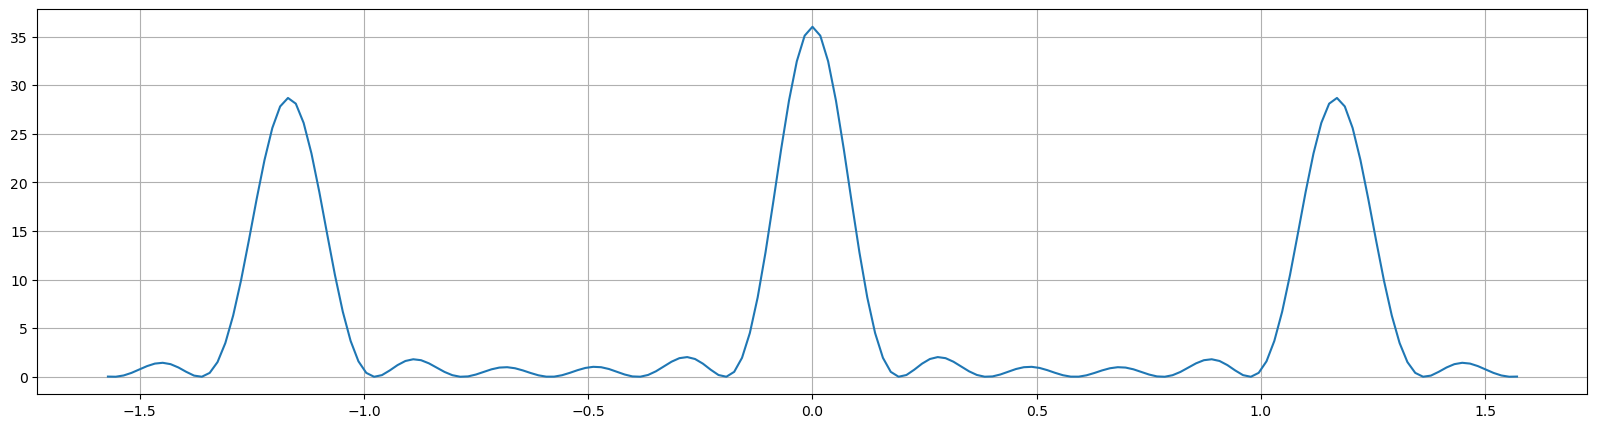

In [118]:
plt.figure(figsize = (20, 5))
plt.grid()
plt.plot(o*20*180, io)